In [1]:
import pyemma
import os
import matplotlib.pyplot as plt
import numpy as np
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
from pyemma import config
import mdtraj as md

In [2]:
p_res=228 # NUmber of protein amino-acid residues
topfile='/home/jaya/work/JK/hsp90/binding/xtc/prot_l1.pdb'
outdir = '/home/jaya/work/JK/hsp90/binding/msm_binary/data/long/'

ind_arr = np.zeros((p_res,2))


#feat = coor.featurizer(topfile)
for i in range(0,p_res) :

        ind_arr[i][0]=228
        ind_arr[i][1]=i

xtc = md.load('/home/jaya/work/JK/hsp90/binding/xtc/1.xtc', top=topfile) 
# '/home/jaya/work/JK/hsp90/binding/xtc/2.xtc'


In [3]:
pair_dist=[]
for i in range(0,228):
    dist = md.compute_contacts(xtc, contacts=[[i,228]], scheme='closest-heavy',periodic=True)[0][:,0]
    pair_dist.append(dist)

dist_feat_arr = np.stack(pair_dist,axis=1)
#contacts = np.asarray(pair_dist).astype(float)
cutoff = 0.5
contact_matrix = np.where(dist_feat_arr < cutoff, 1, 0)
#contact_prob = np.sum(contact_matrix, axis=0)/trj.n_frames
np.save(outdir+'1.npy', contact_matrix, '%i')
#dist_feat_arr = np.stack(pair_dist,axis=1)


In [5]:
del xtc ; del pair_dist ; del dist ; del dist_feat_arr ; del contact_matrix 

In [6]:
outdir = '/home/jaya/work/JK/hsp90/binding/msm_binary/data/B_1/'

for i in range(1,11) :
    file_='/home/jaya/work/JK/hsp90/binding/xtc/b_100ns/1/'+str(i)+'.xtc'
    xtc = md.load(file_,top=topfile)

    pair_dist = []
    for j in range(0,p_res):
        dist = md.compute_contacts(xtc, contacts=[[i,228]], scheme='closest-heavy',periodic=True)[0][:,0]
        pair_dist.append(dist)
    
    dist_feat_arr = np.stack(pair_dist,axis=1)
    print(np.shape(dist_feat_arr))
    cutoff = 0.5
    contact_matrix = np.where(dist_feat_arr < cutoff, 1, 0)

    np.save(outdir+str(i)+'.npy',contact_matrix)


(10001, 228)
(10001, 228)
(10001, 228)
(10001, 228)
(10001, 228)
(10001, 228)
(10001, 228)
(10001, 228)
(10001, 228)
(10001, 228)


In [7]:
outdir = '/home/jaya/work/JK/hsp90/binding/msm_binary/data/B_2/'

for i in range(1,11) :
    file_='/home/jaya/work/JK/hsp90/binding/xtc/b_100ns/2/'+str(i)+'.xtc'
    xtc = md.load(file_,top=topfile)

    pair_dist = []
    for j in range(0,p_res):
        dist = md.compute_contacts(xtc, contacts=[[i,228]], scheme='closest-heavy',periodic=True)[0][:,0]
        pair_dist.append(dist)
    
    dist_feat_arr = np.stack(pair_dist,axis=1)
    print(np.shape(dist_feat_arr))
    cutoff = 0.5
    contact_matrix = np.where(dist_feat_arr < cutoff, 1, 0)

    np.save(outdir+str(i)+'.npy',contact_matrix)


(10001, 228)
(10001, 228)
(10001, 228)
(10001, 228)
(10001, 228)
(10001, 228)
(10001, 228)
(10001, 228)
(10001, 228)
(10001, 228)


In [10]:
outdir = '/home/jaya/work/JK/hsp90/binding/msm_binary/data/UB/'

for i in range(1,18) :
    file_='/home/jaya/work/JK/hsp90/binding/xtc/ub_50ns/'+str(i)+'.xtc'
    xtc = md.load(file_,top=topfile)

    pair_dist = []
    for j in range(0,p_res):
        dist = md.compute_contacts(xtc, contacts=[[i,228]], scheme='closest-heavy',periodic=True)[0][:,0]
        pair_dist.append(dist)
    
    dist_feat_arr = np.stack(pair_dist,axis=1)
    print(np.shape(dist_feat_arr))
    cutoff = 0.5
    contact_matrix = np.where(dist_feat_arr < cutoff, 1, 0)

    np.save(outdir+str(i)+'.npy',contact_matrix)


(5001, 228)
(5001, 228)
(5001, 228)
(5001, 228)
(5001, 228)
(5001, 228)
(5001, 228)
(5001, 228)
(5001, 228)
(5001, 228)
(5001, 228)
(5001, 228)
(5001, 228)
(5001, 228)
(2261, 228)
(5001, 228)
(2061, 228)


In [11]:
del xtc ; del pair_dist ; del dist ; del dist_feat_arr ; del contact_matrix 

In [12]:
data=[]

for i in range(1,3):
    file_ = '/home/jaya/work/JK/hsp90/binding/msm_binary/data/long/'+str(i)+'.npy'
    l = np.load(file_,allow_pickle=True)
    data.append(list(l))

for i in range(1,11):
    file_ = '/home/jaya/work/JK/hsp90/binding/msm_binary/data/B_1/'+str(i)+'.npy'
    b1 = np.load(file_,allow_pickle=True)
    data.append(list(b1))

for i in range(1,11):
    file_ = '/home/jaya/work/JK/hsp90/binding/msm_binary/data/B_2/'+str(i)+'.npy'
    b2 = np.load(file_,allow_pickle=True)
    data.append(list(b2))

for i in range(1,18):
    file_ = '/home/jaya/work/JK/hsp90/binding/msm_binary/data/UB/'+str(i)+'.npy'
    ub = np.load(file_,allow_pickle=True)
    data.append(list(ub))


In [13]:
np.save('/home/jaya/work/JK/hsp90/binding/msm_binary/all_data.npy',data)

/home/jaya/softwares/miniconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [15]:
lag = 500  # tica lagtime
tica_obj = coor.tica(data, lag=lag, var_cutoff=0.8)
print ('Retained dimension: ', tica_obj.dimension())


100%|████████████████████████████████████████████████████████████████████| 45/45 [00:03<00:00, 13.20it/s]

Retained dimension:  35


In [16]:
Y = tica_obj.get_output()

100%|████████████████████████████████████████████████████████████████████| 45/45 [00:01<00:00, 40.63it/s]


In [17]:
np.save('/home/jaya/work/JK/hsp90/binding/msm_binary/Y_38D.npy',Y)

/home/jaya/softwares/miniconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [19]:
n_clusters = 500

cluster = coor.cluster_kmeans(Y, k=n_clusters, max_iter=1000, tolerance=1e-10, fixed_seed=True)

#cluster.save('500C_1ns.h5')

dtrajs = cluster.dtrajs
np.save('/home/jaya/work/JK/hsp90/binding/msm_binary/dtrajs_500C', dtrajs)

histogram = np.bincount(np.concatenate(dtrajs), minlength=len(cluster.clustercenters))

np.savetxt('/home/jaya/work/JK/hsp90/binding/msm_binary/cluster_counts_500C.txt',histogram,fmt='%d')


mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1])
cc_x=cluster.clustercenters[:,0]
cc_y=cluster.clustercenters[:,1]
plt.plot(cc_x,cc_y, linewidth=0, marker='o', markersize=3, color='black')
plt.savefig("/home/jaya/work/JK/hsp90/binding/msm_binary/fes_cc_500C.png")
plt.clf()


100%|██████████████████████████████████████████████████████████████████| 500/500 [00:32<00:00, 15.50it/s]

100%|████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 54.88it/s]
/home/jaya/softwares/miniconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


NameError: name 'X' is not defined

<Figure size 432x288 with 0 Axes>

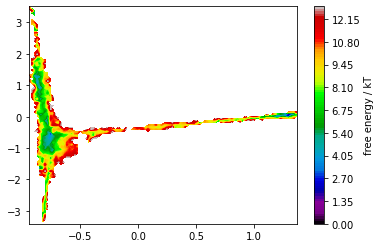

In [24]:
mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1])
plt.savefig("/home/jaya/work/JK/hsp90/binding/msm_binary/fes_500C.png")
#plt.clf()

In [22]:
lags=1000
its = pyemma.msm.its(dtrajs, lags=lags , nits=10)

100%|████████████████████████████████████████████████████████████████████| 17/17 [00:01<00:00,  9.22it/s]


/tmp/ipykernel_16023/1494416366.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, )
/tmp/ipykernel_16023/1494416366.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, )
/tmp/ipykernel_16023/1494416366.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, )
/tmp/ipykernel_16023/1494416366.py:25: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, )
/tmp/ipykernel_16023/1494416366.py:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, )
/tmp/ipykernel_16023/1494416366.py:41: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, )


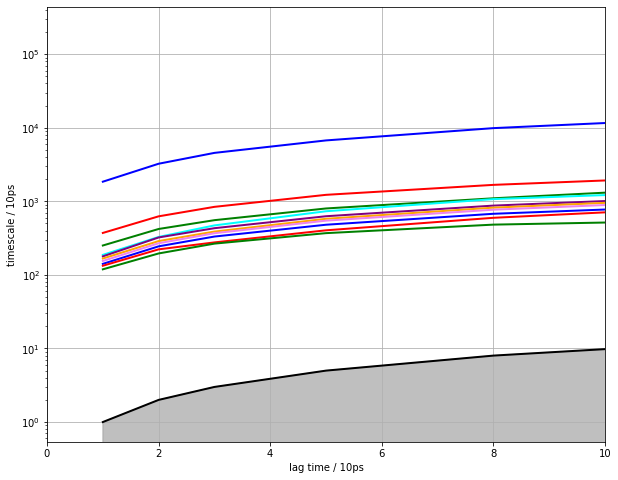

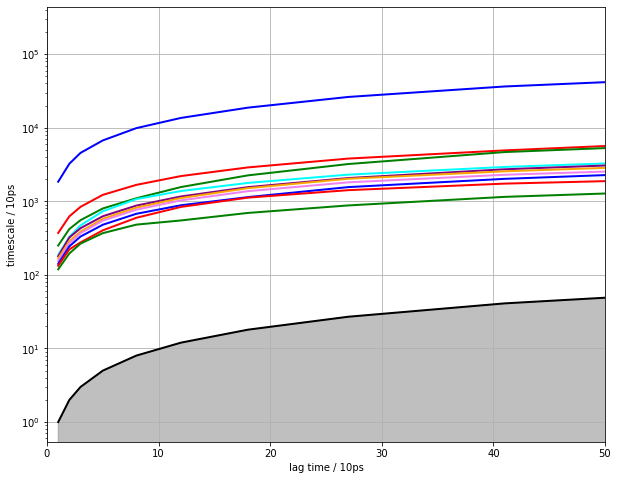

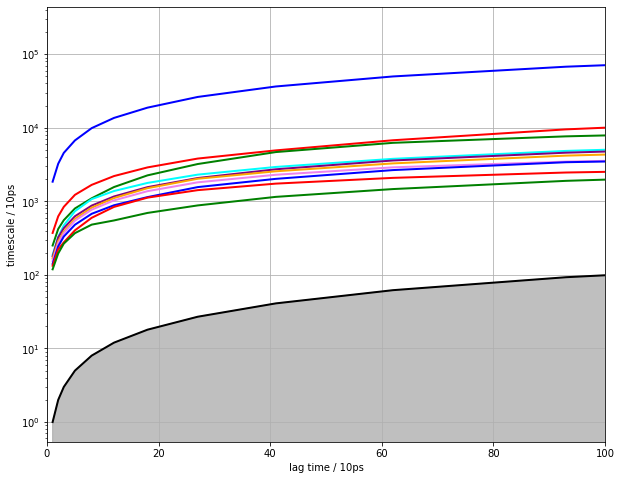

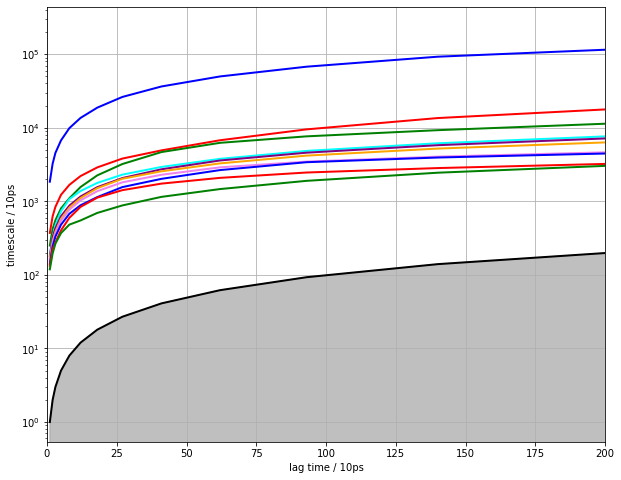

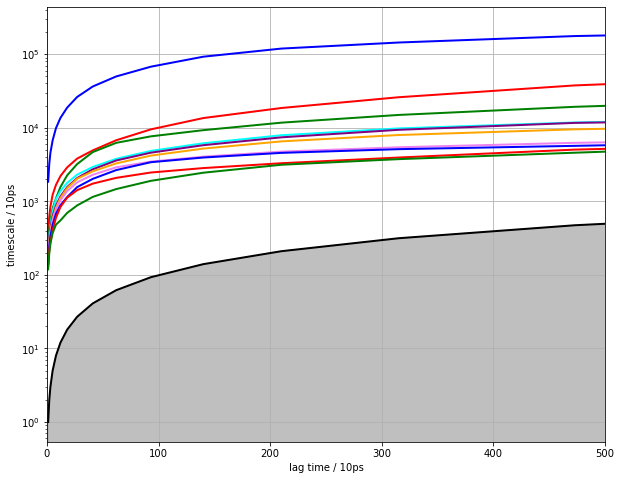

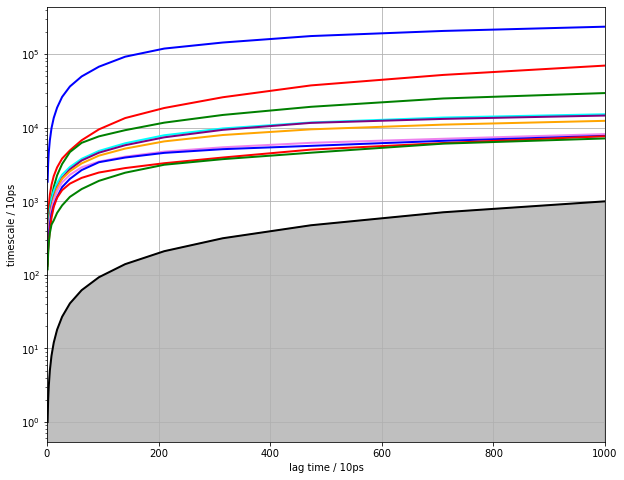

In [23]:
plt.figure(figsize=(10,8))
mplt.plot_implied_timescales(its, ylog=True, show_mean=False, units='10ps', linewidth=2)
plt.ylim(0, )
plt.xlim(0, 10)
plt.grid(axis='both')
plt.savefig('./its_1.png')


plt.figure(figsize=(10,8))
mplt.plot_implied_timescales(its, ylog=True, show_mean=False, units='10ps', linewidth=2)
plt.ylim(0, )
plt.xlim(0, 50)
plt.grid(axis='both')
plt.savefig('./its_2.png')

plt.figure(figsize=(10,8))
mplt.plot_implied_timescales(its, ylog=True, show_mean=False, units='10ps', linewidth=2)
plt.ylim(0, )
plt.xlim(0, 100)
plt.grid(axis='both')
plt.savefig('./its_3.png')

plt.figure(figsize=(10,8))
mplt.plot_implied_timescales(its, ylog=True, show_mean=False, units='10ps', linewidth=2)
plt.ylim(0, )
plt.xlim(0, 200)
plt.grid(axis='both')
plt.savefig('./its_4.png')


plt.figure(figsize=(10,8))
mplt.plot_implied_timescales(its, ylog=True, show_mean=False, units='10ps', linewidth=2)
plt.ylim(0, )
plt.xlim(0, 500)
plt.grid(axis='both')
plt.savefig('./its_5.png')


plt.figure(figsize=(10,8))
mplt.plot_implied_timescales(its, ylog=True, show_mean=False, units='10ps', linewidth=2)
plt.ylim(0, )
plt.xlim(0, 1000)
plt.grid(axis='both')
plt.savefig('./its_6.png')


100%|██████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.12s/it]


fraction of states used =  1.0
fraction of counts used =  1.0


<Figure size 720x576 with 0 Axes>

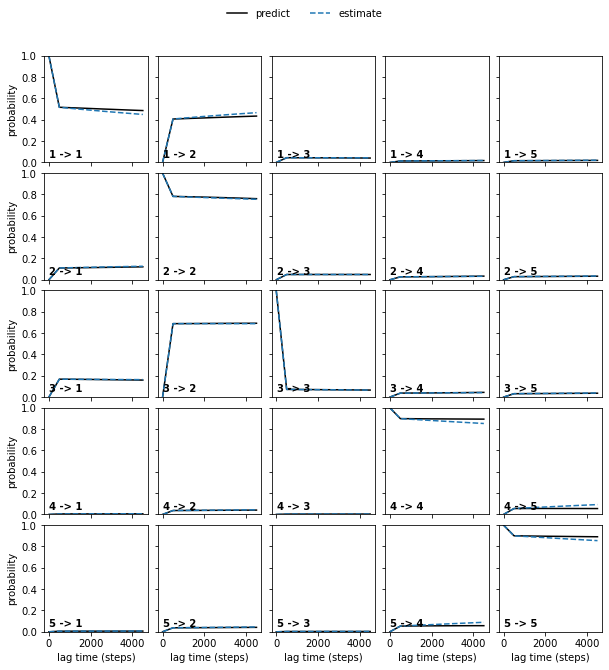

In [26]:
lag=500
n_states=4

M = msm.estimate_markov_model(dtrajs, lag=lag)
#M=msm.bayesian_markov_model(dtrajs, lag=lag)
#M.save('/home/jaya/work/JK/hsp90/binding/msm_binary/M_500.h5',overwrite=True)


plt.figure(figsize=(10,8))
mplt.plot_cktest(M.cktest(n_states))
plt.savefig('/home/jaya/work/JK/hsp90/binding/msm_binary/ck500_4.png',dpi=110)
#plt.clf()


print('fraction of states used = ', M.active_state_fraction)
print('fraction of counts used = ', M.active_count_fraction)


100%|██████████████████████████████████████████████████████████████████████| 9/9 [00:18<00:00,  2.10s/it]


<Figure size 720x576 with 0 Axes>

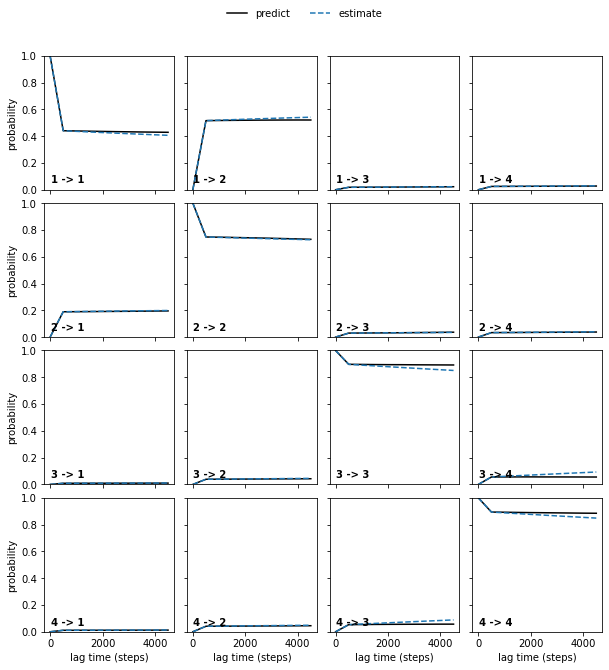

In [27]:
plt.figure(figsize=(10,8))
mplt.plot_cktest(M.cktest(4))
plt.savefig('/home/jaya/work/JK/hsp90/binding/msm_binary/ck500_4.png',dpi=110)

In [40]:
M.pcca(4)
M.metastable_sets

[array([  5,  64,  81,  82, 190, 267, 280, 351, 392, 497]),
 array([  0,   3,   4,   6,   7,   9,  10,  11,  12,  13,  14,  15,  16,
         17,  19,  20,  21,  22,  24,  25,  26,  28,  29,  31,  32,  33,
         34,  35,  36,  37,  38,  39,  41,  43,  44,  45,  46,  47,  50,
         51,  52,  53,  54,  55,  57,  58,  59,  60,  61,  63,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  76,  77,  79,  80,  83,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 103, 104, 105, 106, 107, 108, 110, 111, 114,
        115, 116, 117, 118, 119, 120, 123, 124, 125, 126, 129, 130, 131,
        132, 133, 134, 136, 139, 141, 142, 143, 144, 145, 146, 147, 148,
        149, 150, 151, 152, 153, 155, 156, 159, 160, 161, 162, 163, 164,
        165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178,
        179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 191, 192, 193,
        194, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 2

In [74]:
for i, s in enumerate(M.metastable_sets):
    print('π_{} = {:f}'.format(i, M.pi[s].sum()))

π_0 = 0.043174
π_1 = 0.441909
π_2 = 0.255204
π_3 = 0.259712


<Figure size 720x576 with 0 Axes>

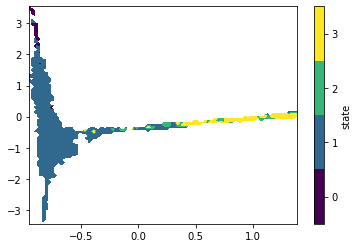

In [42]:
metastable_traj = M.metastable_assignments[np.concatenate(dtrajs)]

plt.figure(figsize=(10,8))
pyemma.plots.plot_state_map(
    *np.concatenate(Y)[:, :2].T, metastable_traj)
#plt.xlabel('TIC1')
#plt.ylabel('TIC2')
#plt.show()
plt.savefig('/home/jaya/work/JK/hsp90/binding/msm_binary/pcca.png',dpi=310)

SP_0 = 0.043174
SP_1 = 0.441909
SP_2 = 0.255204
SP_3 = 0.259712
0  ---> 1 : 0.034
1  ---> 0 : 0.617
0  ---> 2 : 0.84
2  ---> 0 : 1.385
0  ---> 3 : 0.861
3  ---> 0 : 1.38
1  ---> 2 : 0.785
2  ---> 1 : 0.613
1  ---> 3 : 0.807
3  ---> 1 : 0.606
2  ---> 3 : 0.252
3  ---> 2 : 0.237


<Figure size 1440x1296 with 0 Axes>

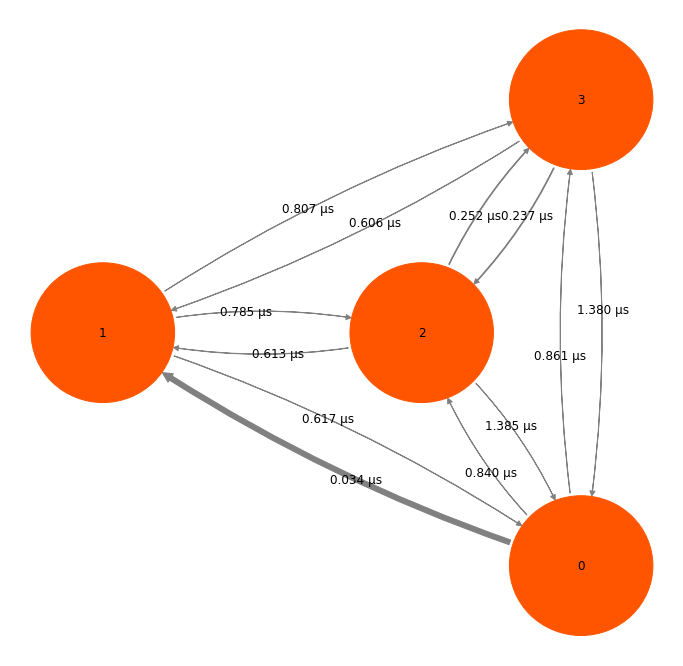

In [91]:
nstates=4
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = (M.mfpt(
            M.metastable_sets[i],
            M.metastable_sets[j])*2*(10**(-6)))

inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]


plt.figure(figsize=(20,18))
pos=np.array([[1, -6], [-5, -3], [-1, -3], [1, 0]])
pyemma.plots.plot_network(inverse_mfpt,arrow_label_format='%.3f \u03BCs',arrow_labels=mfpt,size=12,pos=pos)
plt.savefig('network_mfpt.png',dpi=210)


for i, s in enumerate(M.metastable_sets):
    print('SP_{} = {:f}'.format(i, M.pi[s].sum()))



for i in range(0,len(mfpt)):
        for j in range(i+1,len(mfpt)):
            if (i==j) :
                continue
            else:

                print(i,' --->',j,':', round(mfpt[i][j],3))
                print(j,' --->',i,':', round(mfpt[j][i],3))

In [75]:
A=M.metastable_sets[0]
B=M.metastable_sets[2]
tpt=msm.tpt(M,A,B)
cg, cgflux = tpt.coarse_grain(M.metastable_sets)

paths, path_fluxes = cgflux.pathways(fraction=0.99)
print('percentage       \tpath')
print('-------------------------------------')
for i in range(len(paths)):
    print(np.round(path_fluxes[i] / np.sum(path_fluxes), 3),' \t', paths[i] + 1)

percentage       	path
-------------------------------------
0.581  	 [1 2 4]
0.419  	 [1 2 3 4]


In [76]:
cg

[OrderedSet([5, 64, 81, 82, 190, 267, 280, 351, 392, 497]),
 OrderedSet([0, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 24, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 43, 44, 45, 46, 47, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 79, 80, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 110, 111, 114, 115, 116, 117, 118, 119, 120, 123, 124, 125, 126, 129, 130, 131, 132, 133, 134, 136, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 230, 232, 233, 234, 235, 236, 237, 238, 240, 241, 243, 244, 245, 246, 248

0.581 ==> 0 -> 1 -> 2
0.419 ==> 0 -> 1 -> 3 -> 2

In [77]:
A=M.metastable_sets[0]
B=M.metastable_sets[3]
tpt=msm.tpt(M,A,B)
cg, cgflux = tpt.coarse_grain(M.metastable_sets)

paths, path_fluxes = cgflux.pathways(fraction=0.99)
print('percentage       \tpath')
print('-------------------------------------')
for i in range(len(paths)):
    print(np.round(path_fluxes[i] / np.sum(path_fluxes), 3),' \t', paths[i] + 1)

percentage       	path
-------------------------------------
0.534  	 [1 2 4]
0.466  	 [1 2 3 4]


In [78]:
cg

[OrderedSet([5, 64, 81, 82, 190, 267, 280, 351, 392, 497]),
 OrderedSet([0, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 24, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 43, 44, 45, 46, 47, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 79, 80, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 110, 111, 114, 115, 116, 117, 118, 119, 120, 123, 124, 125, 126, 129, 130, 131, 132, 133, 134, 136, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 230, 232, 233, 234, 235, 236, 237, 238, 240, 241, 243, 244, 245, 246, 248

0.581 ==> 0 -> 1 -> 3
0.419 ==> 0 -> 1 -> 2 -> 3

In [79]:
c = 10.2*10**(-3)  #10.2mM/L
RT = 0.6163314 # RT in kcal/mol at 310.15K
dGv = -(RT*np.log(656303/1661.0)) # Volume correction of energy in kcal/mol


In [81]:
# S0 --> S2

S_ub = input('Stationary population of UB : ')
S_ub = float(S_ub)

S_b = input('Stationary population of B : ')
S_b = float(S_b)

dG = -(RT*np.log(S_b/S_ub))

dG0 = dG + dGv

print ('Result] \u0394G with populations : ', np.round(dG0,3),' kcal/mol')

Stationary population of UB : 0.043174
Stationary population of B : 0.255204
Result] ΔG with populations :  -4.78  kcal/mol


In [89]:
M_on = input('MFPT ON (\u03BCs) :')
M_on = float(M_on)*(10**(-6))

M_off = input('MFPT OFF (\u03BCs) :')
M_off = float(M_off)*(10**(-6))

k_on = 1.0/(M_on*c)
k_off = 1.0/(M_off)

kd = k_off/k_on

dG_kd = RT*np.log(kd)

print ('Result] k_on : ', "{:.3e}".format(k_on))
print ('Result] k_off : ', "{:.3e}".format(k_off))

print ("Result] k_d : " "{:.3e}".format(kd) )

print ('Result] \u0394G with kd_simu :', np.round(dG_kd,3), ' kcal/mol')

MFPT ON (μs) :0.84
MFPT OFF (μs) :1.385
Result] k_on :  1.167e+08
Result] k_off :  7.220e+05
Result] k_d : 6.186e-03
Result] ΔG with kd_simu : -3.134  kcal/mol


In [82]:
# S0 --> S3

S_ub = input('Stationary population of UB : ')
S_ub = float(S_ub)

S_b = input('Stationary population of B : ')
S_b = float(S_b)

dG = -(RT*np.log(S_b/S_ub))

dG0 = dG + dGv

print ('Result] \u0394G with populations : ', np.round(dG0,3),' kcal/mol')

Stationary population of UB : 0.043174
Stationary population of B : 0.259712
Result] ΔG with populations :  -4.791  kcal/mol


In [88]:
M_on = input('MFPT ON (\u03BCs) :')
M_on = float(M_on)*(10**(-6))

M_off = input('MFPT OFF (\u03BCs) :')
M_off = float(M_off)*(10**(-6))

k_on = 1.0/(M_on*c)
k_off = 1.0/(M_off)

kd = k_off/k_on

dG_kd = RT*np.log(kd)

print ('Result] k_on : ', "{:.3e}".format(k_on))
print ('Result] k_off : ', "{:.3e}".format(k_off))

print ("Result] k_d : " "{:.3e}".format(kd) )

print ('Result] \u0394G with kd_simu :', np.round(dG_kd,3), ' kcal/mol')

MFPT ON (μs) :0.84
MFPT OFF (μs) :1.35
Result] k_on :  1.167e+08
Result] k_off :  7.407e+05
Result] k_d : 6.347e-03
Result] ΔG with kd_simu : -3.119  kcal/mol


In [90]:
for i in range(0,4):
    np.savetxt('./'+str(i)+'.txt',M.metastable_sets[i],fmt='%i')